In [7]:
import numpy as np

In [8]:
class AdalineGD(object):
    """ADAptive LInear NEuronの分類器
    
    パラメータ
    ----------------
    eta: float
        学習率(0.0より大きく1.0以下の値)
    n_inter : int
        トレーニングデータのトレーニング回数
    
    属性
    ----------------
    w_ : 1次元配列
        適合後の重み
    errors_: リスト
        各エポックでの誤分類数
    """
    def __init__(self, eta=0.01, n_inter=50):
        self.eta = eta
        self.n_inter = n_inter
        
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        --------------
        X : {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self: object

        """
        self.w_ = np.zeros(1 + X.shape[1])  #重みの初期化（ゼロベクトル)  行列Xの１列目の行数+1　個の0が入ってるベクトル
        self.cost_ = []
        
        for _ in range(self.n_inter):  #トレーニング回数分のトレーニングデータを反復
            #活性化関数の出力計算 f(wtx) = wtx
            output = self.net_input(X)
            #誤差 yi - f(zi) の計算
            errors = (y - output)
            #w1, ..., wmの更新
            # Δwj = nΣi(yi - f(zi))xij (j = 1, ..., m)
            self.w_[1:] += self.eta * X.T.dot(errors)
            #w0の更新 Δw0 = nΣi(yi - f(zi))
            self.w_[0] += self.eta * errors.sum()
            #コスト関数の計算 J(w) = 1/2  Σi(yi - f(zi))**2
            cost = (errors**2).sum() / 2.0
            #コストの格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [9]:
import pandas  as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# サンプルデータ　花の分類

In [11]:
import matplotlib.pyplot as plt

In [12]:
#1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values

In [13]:
# Iris-setosaを-1, Iris-Virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)

In [14]:
#1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0,2]].values

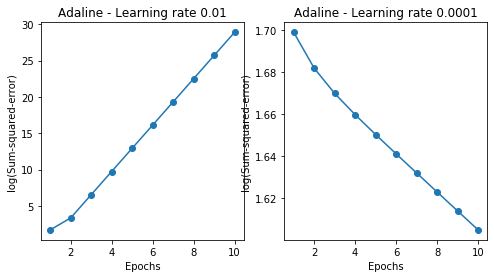

In [17]:
# 描写領域を1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
#勾配降下法によるADALINEの学習(学習率 eta=0.01)
ada1 = AdalineGD(n_inter=10, eta=0.01).fit(X, y)
#エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
#勾配降下法によるADALINEの学習(学習率 eta=0.0001)
ada2 = AdalineGD(n_inter=10, eta=0.0001).fit(X, y)
#エポック数とコストの関係を表す折れ線グラフのプロット(縦軸のコストは常用対数)
ax[1].plot(range(1,len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
#図の表示
plt.show()

In [19]:
###特徴量のスケーリング（標準化）
#データのコピー
X_std = np.copy(X)
#各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとにサンプルをプロット：
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y ==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


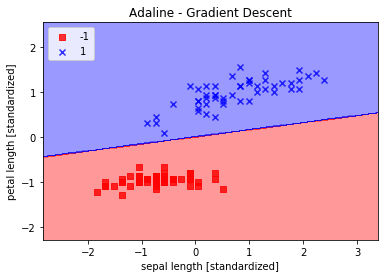

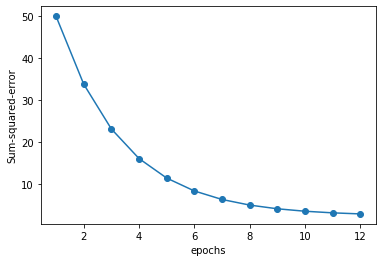

In [26]:
#勾配降下法によるAdalineの学習（標準化後　学習率 eta=0.01)
ada = AdalineGD(n_inter=12, eta=0.01)
#モデルの適合
ada.fit(X_std, y)
#境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
#タイトルの設定
plt.title('Adaline - Gradient Descent')
#軸ラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
#凡例の表示
plt.legend(loc='upper left')
#図の表示
plt.show()
#エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
#軸ラベルの設定
plt.xlabel('epochs')
plt.ylabel('Sum-squared-error')
#図の表示
plt.show()

＃＃＃　確率的勾配降下法　＃＃＃

In [33]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuronの分類器
    
    パラメータ
    ----------------
    eta: float
        学習率(0.0より大きく1.0以下の値)
    n_inter : int
        トレーニングデータのトレーニング回数
    
    属性
    ----------------
    w_ : 1次元配列
        適合後の重み
    errors_: リスト
        各エポックでの誤分類数
    shuffle : bool (デフォルト: True)
        循環を回避するために各エポックでトレーニングデータをシャッフル
    random_state : int (デフォルト: None)
        シャッフルに使用するランダムステートを設定し、重みを初期化
        
    """
    def __init__(self, eta=0.01, n_inter=10, shuffle=True, random_state=None):
        #学習率の初期化
        self.eta = eta
        #トレーニング回数の初期化
        self.n_inter = n_inter
        #重みの初期化フラグはFalseに設定
        self.w_initialized = False
        #各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        #引数random_stateが指定された場合は乱数値を設定
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        --------------
        X : {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        y: 配列のようなデータ構造, shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self: object

        """
        #重みベクトルの生成
        self._initialized_weights(X.shape[1])
        #コストを格納するリストの生成
        self.cost_ = []
        
        #トレーニング回数分のトレーニングデータを反復
        for _ in range(self.n_inter): 
            #指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            #各サンプルのコストを格納するリストの生成
            cost = []
            #各サンプルに対する計算
            for xi, target in zip(X, y):
                #特徴量xi　と　目的変数y　を用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            #サンプルの平均コストの計算
            avg_cost = sum(cost)/ len(y)
            #平均コストの格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        #初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        #目的変数yの要素数が2以上の場合は各サンプルの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        #目的変数yの要素数が一つの場合はサンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """トレーニングデータをシャッフル"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialized_weights(self, m):
        """重みを0に初期化"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        #活性化関数の出力を計算
        output = self.net_input(xi)
        #誤差の計算
        error = (target - output)
        #重み　w1, ..., wm　の更新
        self.w_[1:] += self.eta * xi.dot(error)
        #重み　w0　の更新
        self.w_[0] += self.eta * error
        #コストの計算
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """線形活性化関数の出力を計算"""
        return self.net_input(X)
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


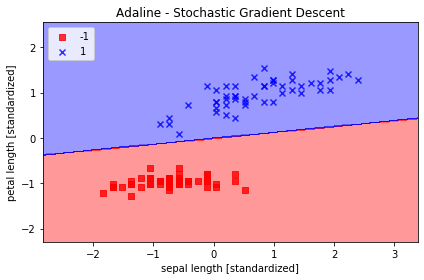

Text(0, 0.5, 'Average Cost')

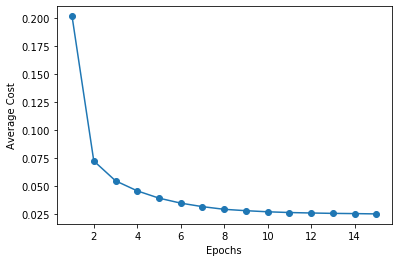

In [39]:
#確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_inter=15, eta=0.01, random_state=1)
#モデルへの適合
ada.fit(X_std, y)
#境界領域のプロット
plot_decision_regions(X_std, y ,classifier=ada)
#タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
#軸ラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
#凡例の設定
plt.legend(loc='upper left')
plt.tight_layout()
#プロットの表示
plt.show()
#エポックのコストと折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
#軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')